# Media Cost Campaign

the dataset come from kaggle' competition : 
https://www.kaggle.com/competitions/playground-series-s3e11/data

the main goal is to determine the cost with the best accuracy


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature scaling if necessary
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# To evaluate the model
from sklearn.metrics import make_scorer,mean_squared_log_error

# Linear regression
from sklearn.linear_model import LinearRegression 

# Ridge regression
from sklearn.linear_model import Ridge

# Lasso regression
from sklearn.linear_model import Lasso

# Random Forrest Regressor
from sklearn.ensemble import RandomForestRegressor

# xgboost model and feature importance
from xgboost import XGBRegressor,plot_importance

# lightgbm model 
from lightgbm import LGBMRegressor

# catboost Regressor model
from catboost import CatBoostRegressor

# Extra Trees Regressor model
from sklearn.ensemble import ExtraTreesRegressor

# Tuning hyperparameters
from sklearn.model_selection import GridSearchCV

RANDOM_STATE = 17

# Loading Data

In [5]:


# Playground dataset train & test
P_train_df = pd.read_csv('train.csv')
P_test_df = pd.read_csv('test.csv')

# Original dataset train & test
O_test_df = pd.read_csv('Original_test_dataset.csv')
O_train_df = pd.read_csv('Original_train_dataset.csv')



In [7]:
P_train_df.head(2)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80


In [6]:
O_train_df.head(2)

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,2.68,2.0,1.0,0.0,2.0,6.3,1.0,0.0,22.0,30584.0,1.0,1.0,1.0,1.0,1.0,79.59
1,5.73,3.0,5.0,5.0,3.0,18.7,1.0,0.0,30.0,20319.0,0.0,0.0,0.0,0.0,0.0,118.36


In [8]:
P_test_df.head(2)

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,360336,7.24,4.0,1.0,0.0,2.0,10.80,0.0,1.0,7.0,20319.0,0.0,0.0,0.0,0.0,0.0
1,360337,6.90,2.0,2.0,2.0,3.0,8.51,1.0,0.0,4.0,33858.0,1.0,0.0,1.0,1.0,1.0


In [9]:
print(f"Playground dataset has {P_train_df.shape[1]} features and {P_train_df.shape[0]} training examples.")
print(f"Original dataset has {O_train_df.shape[1]} features and {O_train_df.shape[0]} training examples.")

Playground dataset has 17 features and 360336 training examples.
Original dataset has 16 features and 51363 training examples.


In [10]:


P_train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float64
 13  salad_bar     

# EDA

## Feature distribution

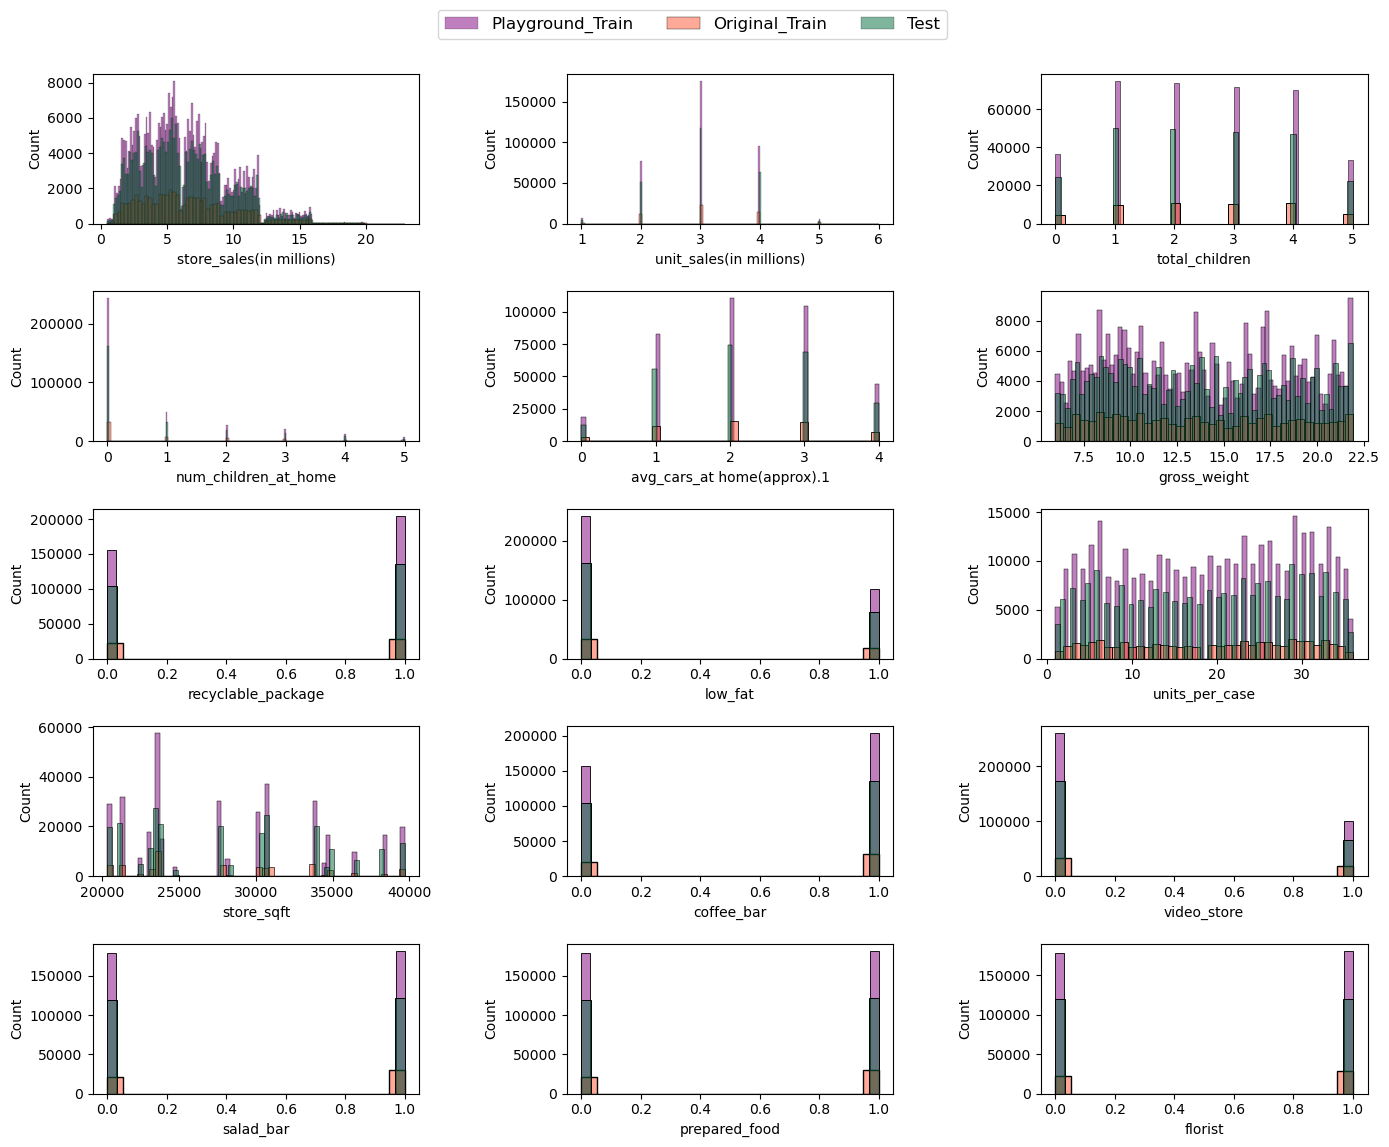

In [11]:
# Create multiple plots with a given size
fig = plt.figure(figsize=(15,12))

features = P_train_df.columns[1:-1]

# Create a countplot to evaluate the distribution
for i, feature in enumerate(features):
    ax = plt.subplot(5, 3, i+1)
    sns.histplot(x=feature, data=P_train_df, label="Playground_Train", color='#800080', ax=ax, alpha=0.5)
    sns.histplot(x=feature, data=O_train_df, label="Original_Train", color='#FF5733', ax=ax, alpha=0.5)
    sns.histplot(x=feature, data=P_test_df, label="Test", color='#006b3c', ax=ax, alpha=0.5)
#     ax.set_xlabel(feature, fontsize=12)

# Create the legend
fig.legend(labels=['Playground_Train', 'Original_Train', 'Test'], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=12, ncol=3)

# Adjust the spacing between the subplots and the legend
fig.subplots_adjust(top=0.90, bottom=0.05, left=0.10, right=0.95, hspace=0.45, wspace=0.45)

plt.show()

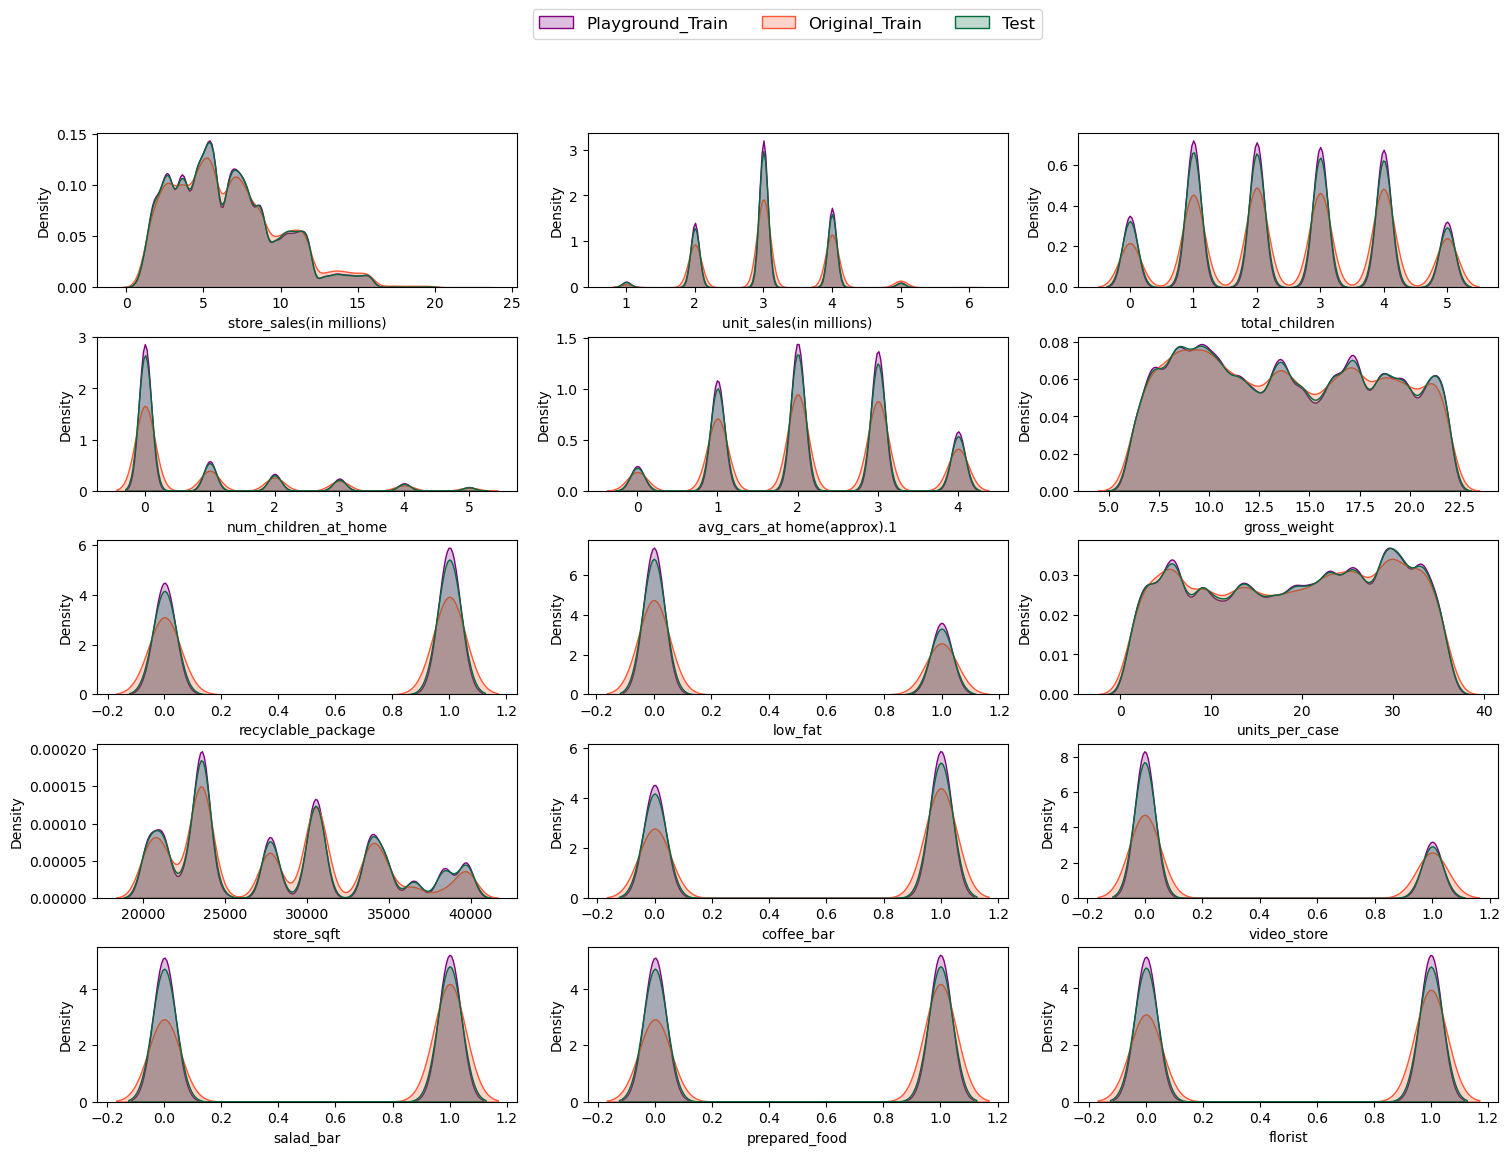

In [12]:
# Create multiple plots
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15,12))
fig.tight_layout(pad=2)

fig.subplots_adjust(top=0.85)  # adjust top margin to make space for legend

features = P_train_df.columns[1:-1]

# Create a countplot to evaluate the distribution
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.kdeplot(x=feature, data=P_train_df, label="Playground_Train", color='#800080', fill=True, ax=ax)
    sns.kdeplot(x=feature, data=O_train_df, label="Original_Train", color='#FF5733', fill=True, ax=ax)
    sns.kdeplot(x=feature, data=P_test_df, label="Test", color='#006b3c', fill=True, ax=ax)
    
fig.legend(labels=['Playground_Train', 'Original_Train', 'Test'], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=12, ncol=3)


 ### Insights:
Comparison of different features in train and test dataset depict an identical distribution
Continuous and Categorical features could be identified:
- These features are binary: recyclable_package, low_fat, coffee_bar, video_store, salad_bar, prepared_food, florist
- These features have 5-6 distinct values and can be treated as categorical: unit_sales(in millions), total_children, num_children_at_home, avg_cars_at home(approx).1
- We got 4 Continuous features store_sales(in millions), gross_weight, units_per_case, store_sqft



##  Categorical and Continues distribution

Lets asses the distribution of categorical features in the train database closely.

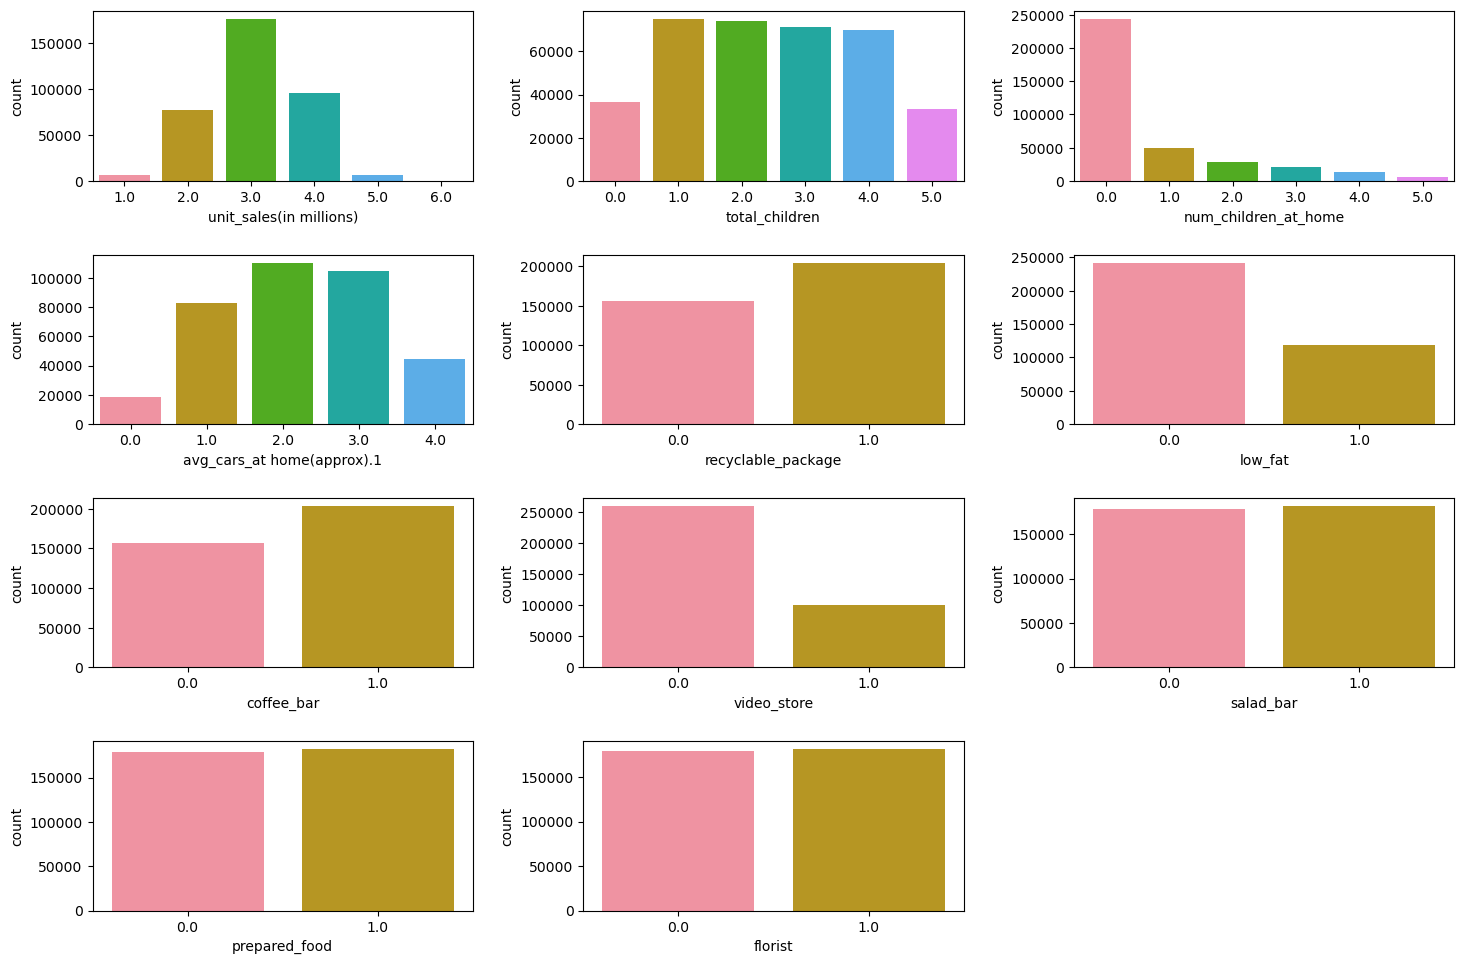

In [13]:
Continuous = ["store_sales(in millions)", "gross_weight", "units_per_case", "store_sqft"]
binary = ["recyclable_package", "low_fat", "coffee_bar", "video_store", "salad_bar", "prepared_food", "florist"]
categorical = ["unit_sales(in millions)", "total_children", "num_children_at_home", "avg_cars_at home(approx).1"]
categorical.extend(binary)

# Create a custom HUSL color palette with a different color
colors = sns.husl_palette(n_colors=6, s=1.0, l=0.7)

# Create multiple plots with a gicven size
fig = plt.figure(figsize=(15,10))


# Create a countplot to evaluate the distribution
for i, cat_feature in enumerate(categorical):
    ax = plt.subplot(4, 3, i+1)
    sns.countplot(x=cat_feature, data=P_train_df, palette=colors, ax=ax)

# Fitting the labels for each plot    
fig.tight_layout(pad=2)

### Insights

    Dataset has an even distribution regarding salad_bar, prepared_food, florist.
    However coffee_bar, recyclable_package are mostly seen to be present.
    Moreover video_store, low_fat seems to be more likely to be zero in the dataset.
    unit_sales class 6 cannot really be identified.
    And salad_bar and prepared_food are almost the same and it might be good to remove either of them.





After the evaluation of distribution of categorical feature we can study the continuous features with histogram.


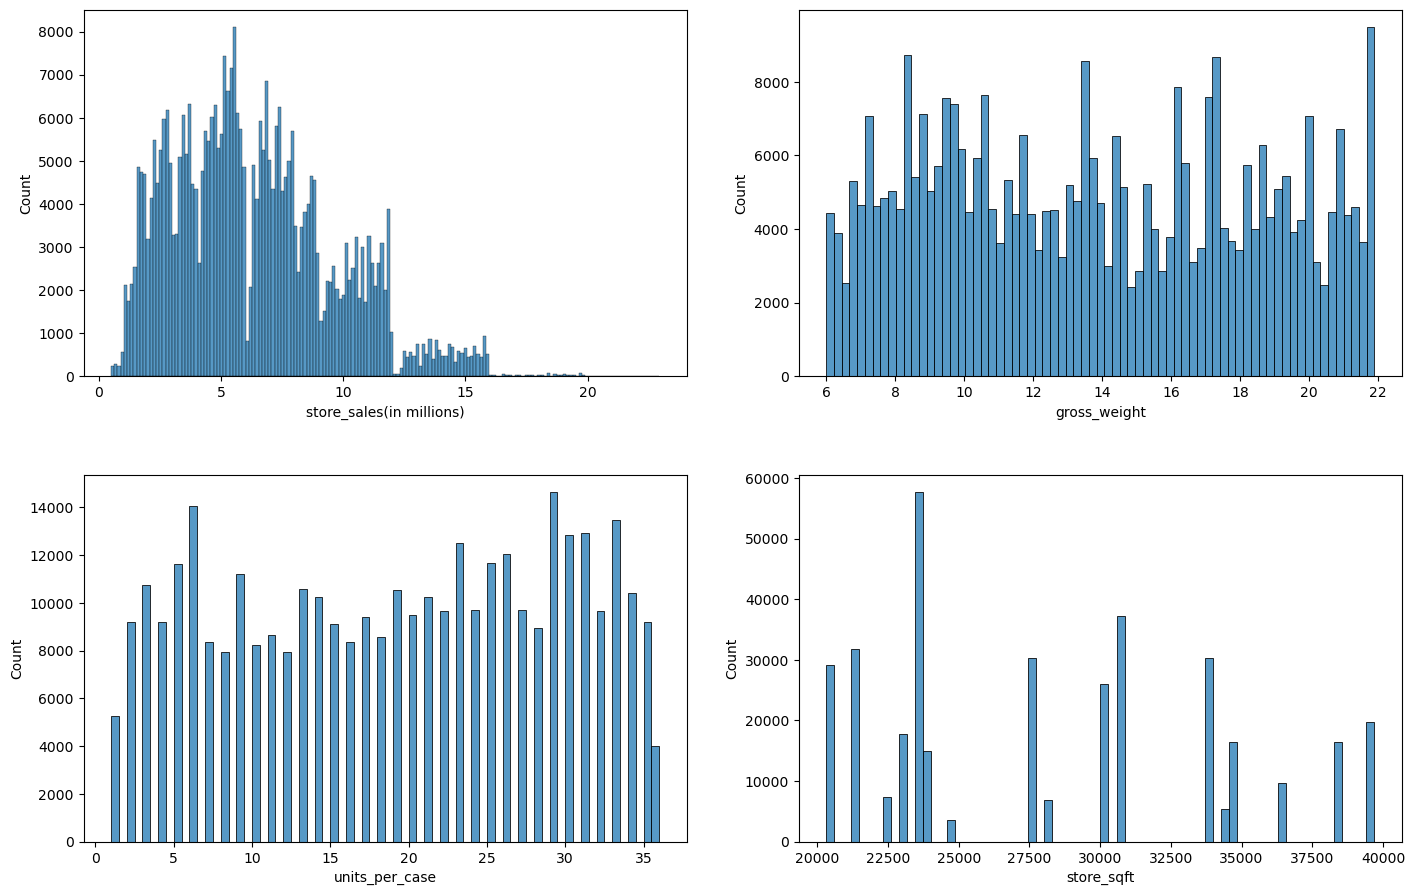

In [14]:
# Create multiple plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
fig.tight_layout(pad=5)

# Create a countplot to evaluate the distribution
for i, num_feature in enumerate(Continuous):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.histplot(x=num_feature, data=P_train_df, ax=ax)

### Insights:

    Considering the variation of store_sales(in millions) we can interpret that most of our data is around 5 million store_sales and as it gets higher our data starts to diminish.
    On the other hand, gross_weight, units_per_case seem to be distributed evenly.
    Moreover, store_sqft represent that most of the available data is about 22500 sqft.
    store_sqft feature got only 20 distinct values and units_per_case feature got only 30 distinct values.



## Target Variable Distribution

In [15]:
target_col = "cost"

# Calculate the unique values, median, mean, and mode of the target variable
unique_values = len(P_train_df[target_col].unique())
maximum = P_train_df[target_col].max()
minimum = P_train_df[target_col].min()
median = P_train_df[target_col].median()
mean = P_train_df[target_col].mean()
mode = P_train_df[target_col].mode().values[0]

print(f'''
Target variable description
Number of unique_values = {unique_values}
Maximum = {maximum}
Minimum = {minimum}
Median = {median}
Mean = {mean}
Mode = {mode}
''')


Target variable description
Number of unique_values = 328
Maximum = 149.75
Minimum = 50.79
Median = 98.81
Mean = 99.61472939145688
Mode = 101.84



<AxesSubplot:xlabel='cost', ylabel='Count'>

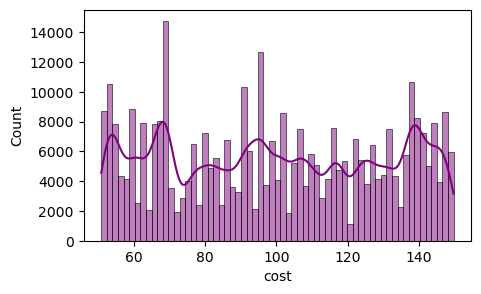

In [16]:


fig = plt.figure(figsize=(5,3))
sns.histplot(data=P_train_df, x="cost", kde=True, color='purple', alpha=0.5)




### Insights:

    Looking in the distribution of cost we understand that the distribution is skewed with multiple peaks and valleys and there are no outliers in the target variable.
    In this case, the presence of multiple local maxima and minima in the distribution may suggest that the factors that influence the outcome interact with each other in complex ways.
    cost has around 328 unique values which means that the target is somewhat continuous.



## Features and target variable relations

Thirdly we can study the effect of different features on our target variable. For instance, let's see the effect of categorical features on the target value.

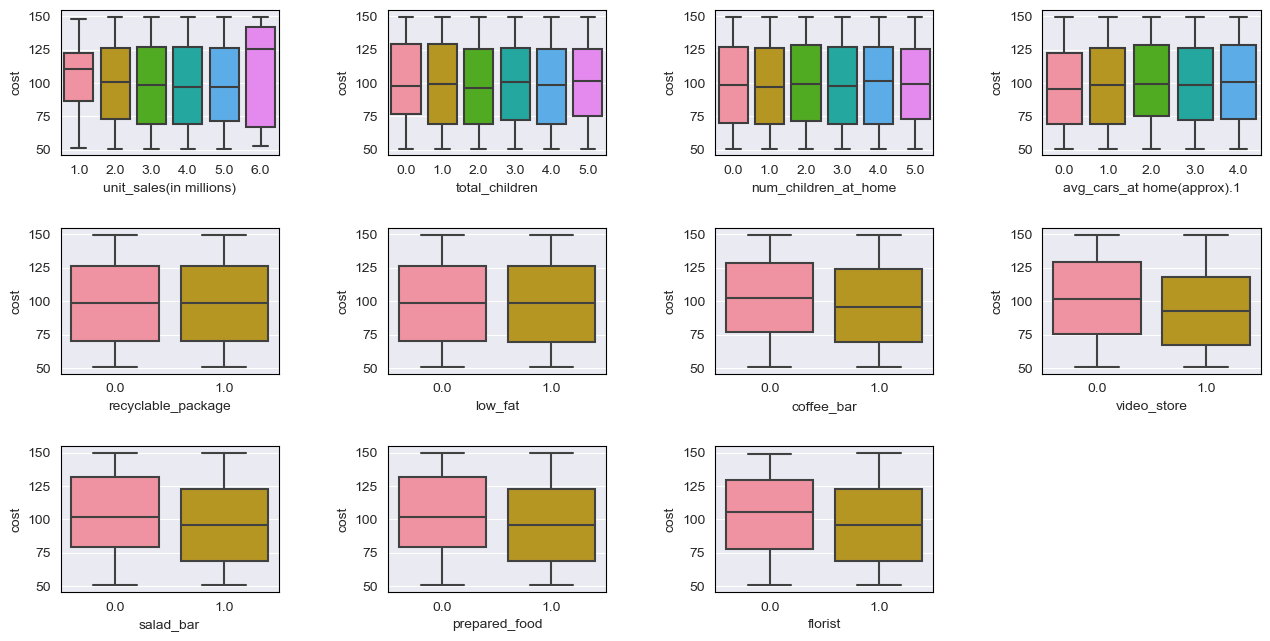

In [17]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Create a custom HUSL color palette with a different color
colors = sns.husl_palette(n_colors=6, s=1.0, l=0.7)

# Set the style
sns.set_style('darkgrid', {'axes.linewidth': 2, 'axes.edgecolor':'black'})

# Create categorical features subplots
for i, cat_feature in enumerate(categorical):
    ax = plt.subplot(4, 4, i+1)
    sns.boxplot(y="cost", x=cat_feature , data=P_train_df, ax=ax, palette=colors)
    
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=.5, wspace=0.5)

## Correlation Matrix

Correlation matrix is always an important tool to understand the patterns between the features and understand the important features

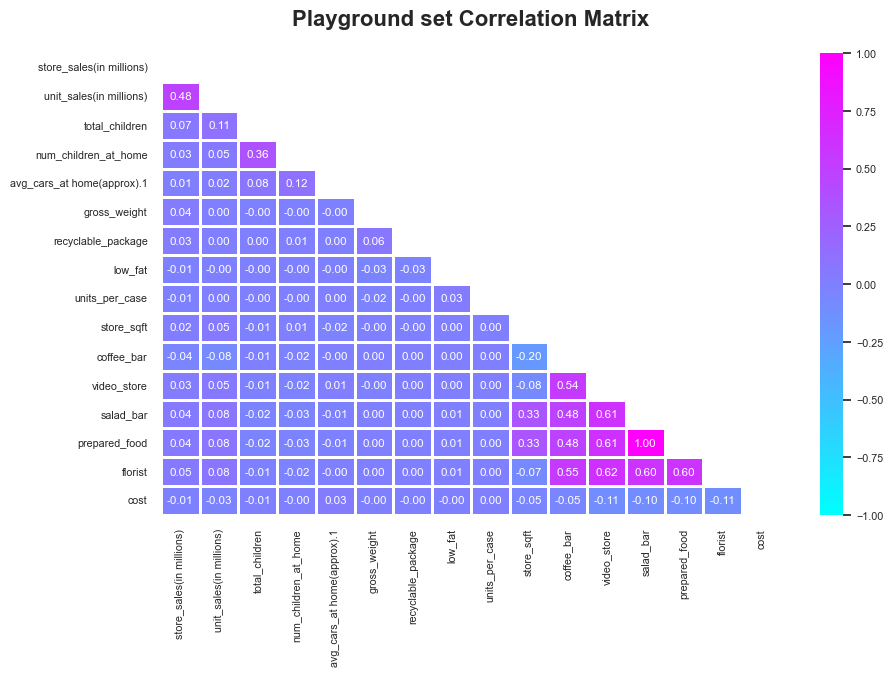

In [18]:
corr = P_train_df.iloc[:,1:].corr()

# create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create heatmap
plt.figure(figsize=(10, 6))
# set theme to change overall style
sns.set_theme(style="white", font_scale=0.7)
sns.heatmap(corr, cmap="cool", linewidths=2, mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Playground set Correlation Matrix", fontsize=16, weight = 'bold', pad=20)
plt.show()

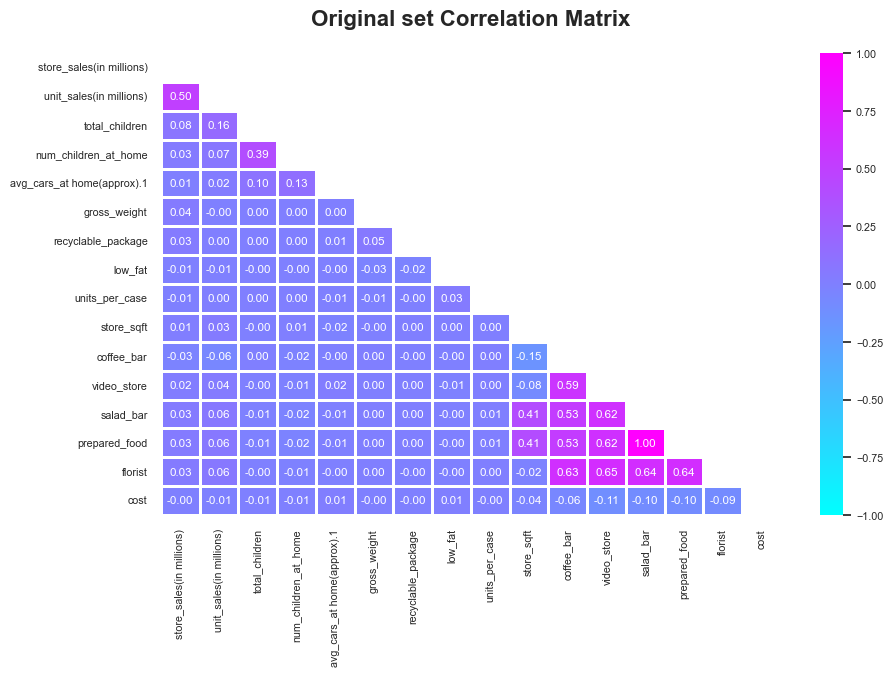

In [19]:
corr = O_train_df.iloc[:,:].corr()

# create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create heatmap
plt.figure(figsize=(10, 6))
# set theme to change overall style
sns.set_theme(style="white", font_scale=0.7)
sns.heatmap(corr, cmap="cool", linewidths=2, mask=mask, vmin=-1, vmax=1, annot=True, fmt=".2f")
plt.title("Original set Correlation Matrix", fontsize=16, weight = 'bold', pad=20)
plt.show()


### Summary:

    Salad_bar and prepared_food are seems to be identical and there is a perfect correlation between them so it would be reasonable to remove one of them.
    As it was mentioned correlation matrix of original and playground training set suggest the same pattern and combination would be reasonable.
    All of features seems to have a low correlation coefficient, therefore they are unable to explain the cost singularly.



## Data Preparation